In [96]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

In [97]:
data = pd.read_csv("../data.csv")
data["week"] = pd.to_datetime(data["week"])

In [98]:
data

,week,volume
0,2022-10-31,0.33
1,2022-11-07,0.47
2,2022-11-14,0.32
3,2022-11-21,1.69
4,2022-11-28,1.23
...,...,...
145,2025-08-11,13.60
146,2025-08-18,15.20
147,2025-08-25,16.24
148,2025-09-01,13.43


- Decomposição entre tendência e sazonalidade
- Ajuste
- Métricas e métodos de avaliação
- Resíduos

## Decomposição da série

In [99]:
data_series = data.set_index("week")["volume"]

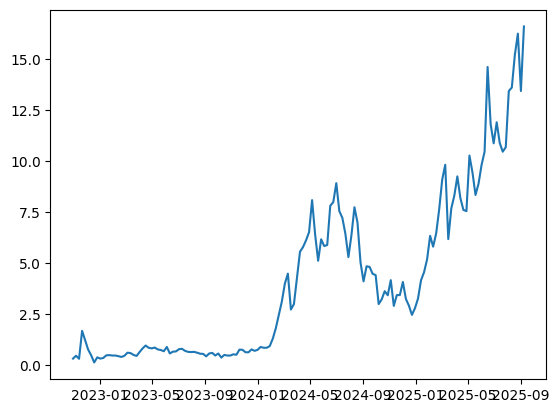

In [100]:
plt.plot(data_series)
plt.show()

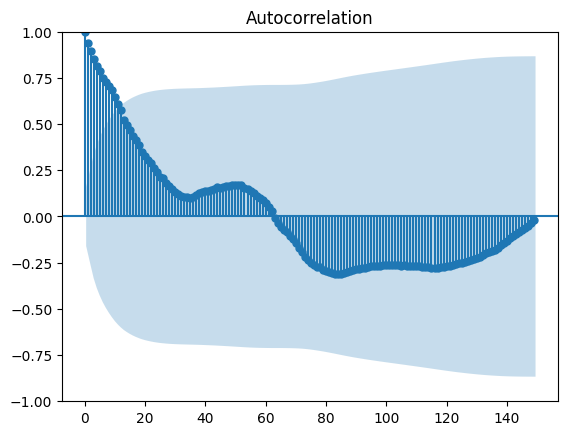

In [101]:
plot_acf(data_series, lags = 149)
plt.show()

Não há evidência de sazonalidade, mas há forte evidência de tendência.

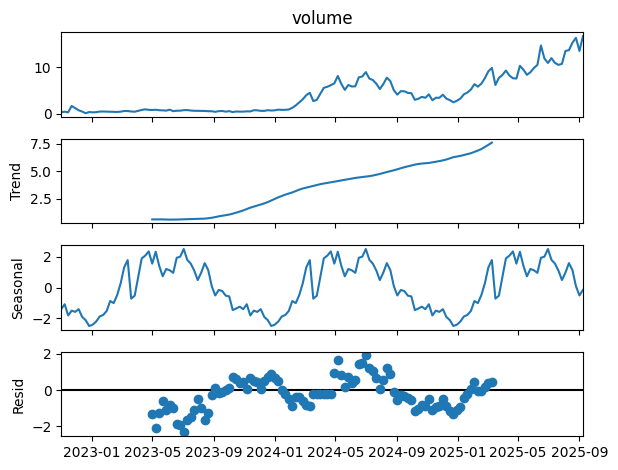

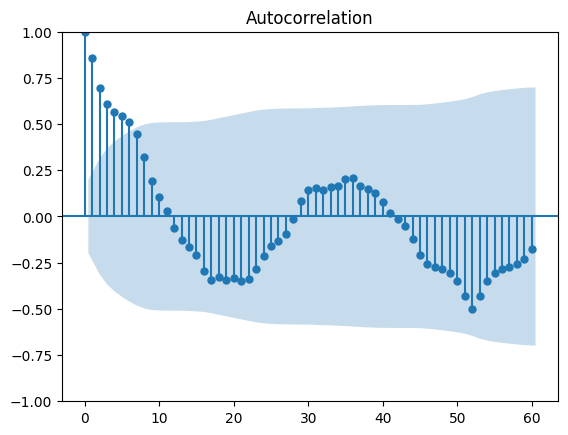

In [102]:
decomposition = seasonal_decompose(data_series, model = "additive", period = 52)

decomposition.plot()
plt.show()

residuals = decomposition.resid.values
residuals = residuals[~np.isnan(residuals)]

plot_acf(residuals, lags = 60)
plt.show()

## Testes de modelos

### Modelo com tendência e com sazonalidade à parte

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     435.9
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           5.86e-46
Time:                        15:20:02   Log-Likelihood:                -302.87
No. Observations:                 150   AIC:                             609.7
Df Residuals:                     148   BIC:                             615.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2981      0.298     -4.354      0.0

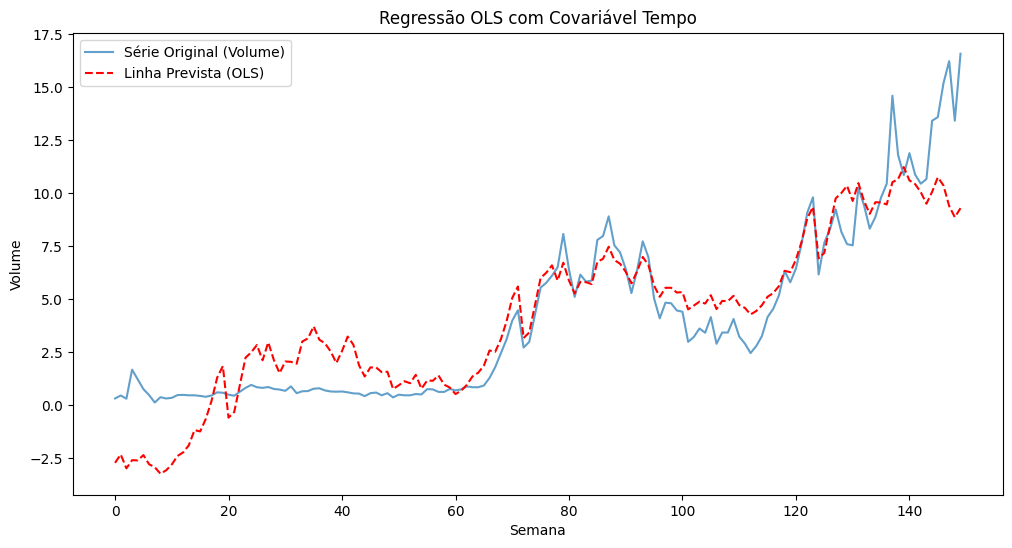

<Figure size 1200x600 with 0 Axes>

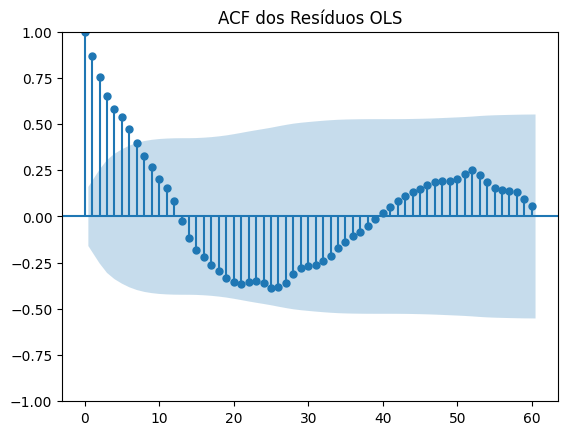

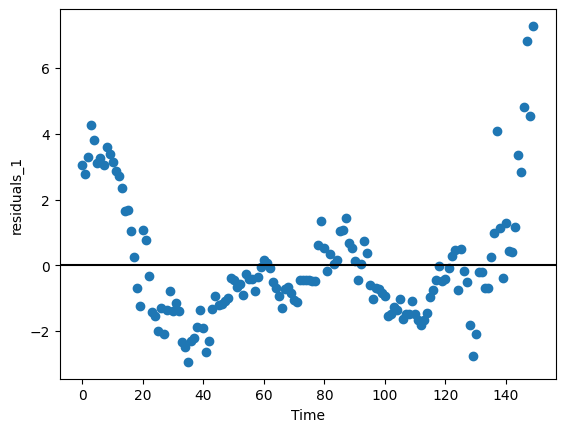

In [103]:
time_covariate = np.arange(len(data_series))

X = sm.add_constant(time_covariate)
y = data_series - decomposition.seasonal

ols_model_1 = sm.OLS(y, X).fit()

print(ols_model_1.summary())

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['volume'], label='Série Original (Volume)', alpha=0.7)
plt.plot(data.index, ols_model_1.predict(X) + decomposition.seasonal, color='red', linestyle='--', label='Linha Prevista (OLS)')
plt.title('Regressão OLS com Covariável Tempo')
plt.xlabel('Semana')
plt.ylabel('Volume')
plt.legend()
plt.show()

residuals_1 = y - ols_model_1.predict(X) - decomposition.seasonal
plt.figure(figsize=(12, 6))
plot_acf(residuals_1, lags=60)
plt.title('ACF dos Resíduos OLS')
plt.show()

plt.scatter(time_covariate, ols_model_1.resid)
plt.xlabel("Time")
plt.ylabel("residuals_1")
plt.axhline(0, color = "black")

In [104]:
mse = np.sum(residuals_1**2)
print(mse)

981.3799875649817


### Modelo com tendência e sazonalidade

In [105]:
data_series_seasonal = data.copy()
print(data_series_seasonal)

num_points = data_series_seasonal.shape[0]

for i in range(2, 53):
    week = np.zeros(num_points)
    j = i - 1
    while j < num_points:
        week[j] = 1
        j += 52
    data_series_seasonal[f"week_{i}"] = week

data_series_seasonal

          week  volume
0   2022-10-31    0.33
1   2022-11-07    0.47
2   2022-11-14    0.32
3   2022-11-21    1.69
4   2022-11-28    1.23
..         ...     ...
145 2025-08-11   13.60
146 2025-08-18   15.20
147 2025-08-25   16.24
148 2025-09-01   13.43
149 2025-09-08   16.59

[150 rows x 2 columns]


,week,volume,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,...,week_43,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52
0,2022-10-31,0.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-11-07,0.47,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-11-14,0.32,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-11-21,1.69,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-11-28,1.23,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2025-08-11,13.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,2025-08-18,15.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,2025-08-25,16.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,2025-09-01,13.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
time_covariate = np.arange(len(data_series))
time_covariate = time_covariate.reshape((-1, 1))

X = data_series_seasonal.drop(["week", "volume"], axis = 1).to_numpy()
X = np.concat([time_covariate, X], axis = 1)
X

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   1.,   0., ...,   0.,   0.,   0.],
       [  2.,   0.,   1., ...,   0.,   0.,   0.],
       ...,
       [147.,   0.,   0., ...,   0.,   0.,   0.],
       [148.,   0.,   0., ...,   0.,   0.,   0.],
       [149.,   0.,   0., ...,   0.,   0.,   0.]], shape=(150, 52))

                            OLS Regression Results                            
Dep. Variable:                 volume   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     8.924
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           2.99e-20
Time:                        15:20:02   Log-Likelihood:                -290.64
No. Observations:                 150   AIC:                             687.3
Df Residuals:                      97   BIC:                             846.8
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3565      1.225     -1.924      0.0

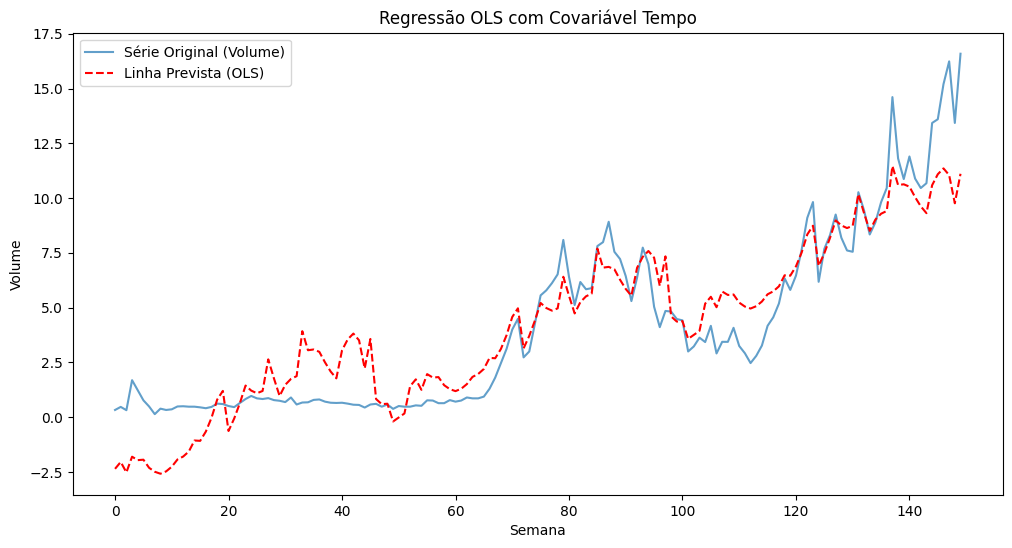

<Figure size 1200x600 with 0 Axes>

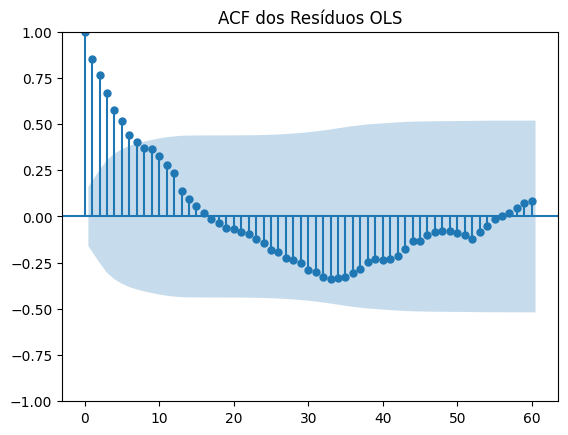

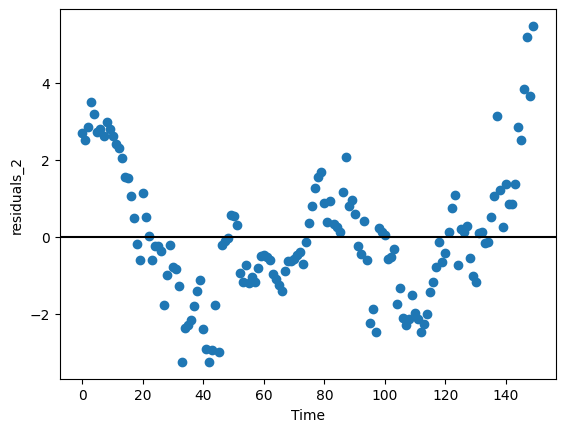

In [107]:
X = sm.add_constant(X)
y = data_series

ols_model_2 = sm.OLS(y, X).fit()

print(ols_model_2.summary())

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['volume'], label='Série Original (Volume)', alpha=0.7)
plt.plot(data.index, ols_model_2.predict(X), color='red', linestyle='--', label='Linha Prevista (OLS)')
plt.title('Regressão OLS com Covariável Tempo')
plt.xlabel('Semana')
plt.ylabel('Volume')
plt.legend()
plt.show()

residuals_2 = ols_model_2.resid
plt.figure(figsize=(12, 6))
plot_acf(residuals_2, lags=60)
plt.title('ACF dos Resíduos OLS')
plt.show()

plt.scatter(time_covariate, ols_model_2.resid)
plt.xlabel("Time")
plt.ylabel("residuals_2")
plt.axhline(0, color = "black")

In [108]:
mse = np.sum(residuals_2**2)
print(mse)

423.2562624561403


### Modelo apenas com tendência

                            OLS Regression Results                            
Dep. Variable:                 volume   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     385.3
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           4.90e-43
Time:                        15:20:02   Log-Likelihood:                -326.13
No. Observations:                 150   AIC:                             656.3
Df Residuals:                     148   BIC:                             662.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7888      0.348     -5.138      0.0

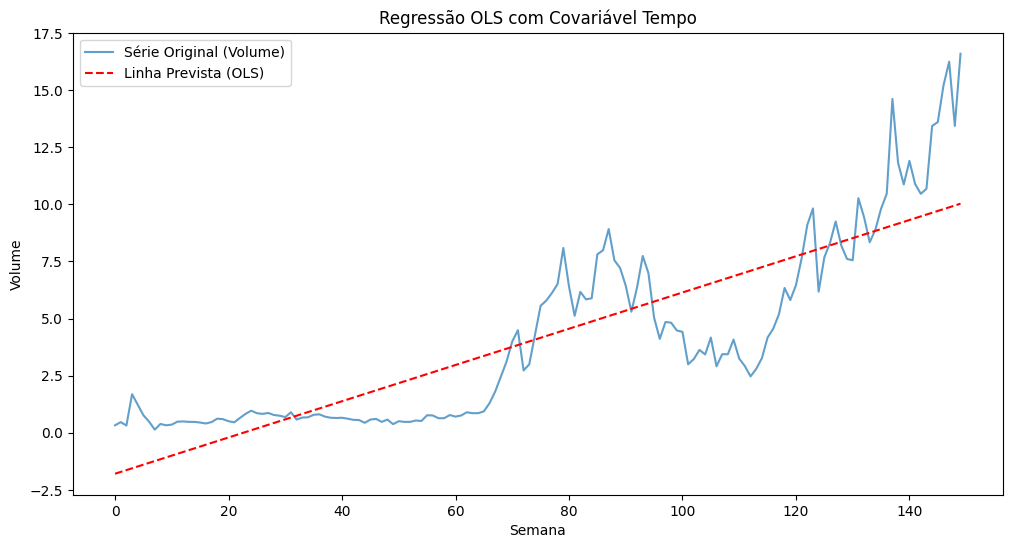

<Figure size 1200x600 with 0 Axes>

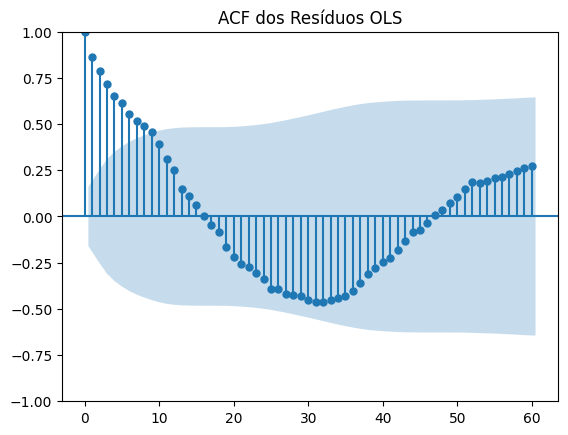

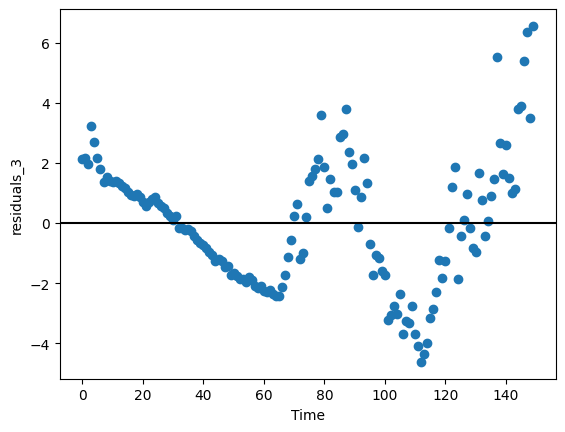

In [109]:
X = sm.add_constant(time_covariate)
y = data_series

ols_model_3 = sm.OLS(y, X).fit()

print(ols_model_3.summary())

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['volume'], label='Série Original (Volume)', alpha=0.7)
plt.plot(data.index, ols_model_3.predict(X), color='red', linestyle='--', label='Linha Prevista (OLS)')
plt.title('Regressão OLS com Covariável Tempo')
plt.xlabel('Semana')
plt.ylabel('Volume')
plt.legend()
plt.show()

residuals_3 = ols_model_3.resid
plt.figure(figsize=(12, 6))
plot_acf(residuals_3, lags=60)
plt.title('ACF dos Resíduos OLS')
plt.show()

plt.scatter(time_covariate, ols_model_3.resid)
plt.xlabel("Time")
plt.ylabel("residuals_3")
plt.axhline(0, color = "black")

In [110]:
mse = np.sum(residuals_3**2)
print(mse)

679.3895076982976


## Comparação dos modelos

In [111]:
f_test_result_2x3 = ols_model_2.compare_f_test(ols_model_3)

print("Valor da estatística F:", f_test_result_2x3[0])
print("p-valor:", f_test_result_2x3[1])

Valor da estatística F: 1.1509703014968955
p-valor: 0.27353431917867765


O modelo apenas com a tendência é equivalente ao modelo com sazonalidade.

In [113]:
H = X @ np.linalg.inv(X.T @ X) @ X.T

loocv_model_1 = (1/y.size) * np.sum((residuals_1/(1 - np.diag(H)))**2)
loocv_model_1

np.float64(6.795157897555065)

In [114]:
loocv_model_3 = (1/y.size) * np.sum((residuals_3/(1 - np.diag(H)))**2)
loocv_model_3

np.float64(4.672490389592039)